# SIT 720 Assignment 2
Bryon Baker

Student number: 85031775

# Install required libraries

In [1]:
!pip3 install pandas
!pip3 install numpy
!pip3 install matplotlib

You should consider upgrading via the '/opt/app-root/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/app-root/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/app-root/bin/python3.8 -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the SCADI Dataset

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

url = 'https://raw.githubusercontent.com/bryonbaker/datasets/main/SIT720/Ass2/SCADI.csv'
full_df = pd.read_csv(url)
print(f"{full_df.head()}\n")

   Gender  Age  d 5100-0  d 5100-1  d 5100-2  d 5100-3  d 5100-4  d 5100-8  \
0       0   18         0         0         0         0         1         0   
1       0   22         0         0         0         0         1         0   
2       0   18         0         0         0         1         0         0   
3       1   18         0         0         0         0         1         0   
4       0   19         0         0         0         0         1         0   

   d 5100-9  d 5101-0  ...  d 57022-8  d 57022-9  d 571-0  d 571-1  d 571-2  \
0         0         0  ...          0          0        0        0        0   
1         0         0  ...          0          0        0        0        0   
2         0         0  ...          0          0        0        0        0   
3         0         0  ...          0          0        0        0        1   
4         0         0  ...          0          0        0        0        1   

   d 571-3  d 571-4  d 571-8  d 571-9  Classes  
0      

In [4]:
# Display stats on the data frame
shape = full_df.shape
print(f"Initial shape: {shape}")

Initial shape: (70, 206)


# Question 1
1. Determine the number of subgroups (clusters) from the dataset using attributes 3-255.
2. Is this the same as the number of classes presented by attribute 206 (Classes)? 
3. Explain and justify your findings.

In [5]:
# Drop attributes: 1, 2, and 205
df = full_df.drop(["Gender","Age","Classes"], axis=1)
shape = df.shape
print(f"New shape: {shape}")
print(f"{df.head()}")

New shape: (70, 203)
   d 5100-0  d 5100-1  d 5100-2  d 5100-3  d 5100-4  d 5100-8  d 5100-9  \
0         0         0         0         0         1         0         0   
1         0         0         0         0         1         0         0   
2         0         0         0         1         0         0         0   
3         0         0         0         0         1         0         0   
4         0         0         0         0         1         0         0   

   d 5101-0  d 5101-1  d 5101-2  ...  d 57022-4  d 57022-8  d 57022-9  \
0         0         0         0  ...          0          0          0   
1         0         0         0  ...          0          0          0   
2         0         0         0  ...          0          0          0   
3         0         0         0  ...          0          0          0   
4         0         0         0  ...          0          0          0   

   d 571-0  d 571-1  d 571-2  d 571-3  d 571-4  d 571-8  d 571-9  
0        0        0   

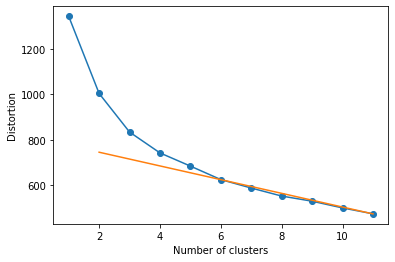

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

num_classes = 6         # Number of classes in the original dataset
distortions = []
ref_xLine = [2,11]
ref_yLine = [625, 475]

min_k = 1
max_k = 12
for n in range(min_k,max_k):
    km = KMeans( n_clusters=n, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0 )
    y_km = km.fit(df)
    distortions.append(km.inertia_)


# Calculate the co-ordinates of the reference line that passes through the points at k=6 and k = 11
x1 = num_classes
x2 = max_k-1
y1 = distortions[num_classes-1]
y2 = distortions[max_k-2]
m =  (y2 - y1) / (x2 - x1)
c = y1 - (m * x1)
ref_y1 = (m * 2) + c    # Calc the left of the reference line
ref_yLine[0] = ref_y1
    
# plot the elbow chart and include a reference line based on the number of classes in the dataset.
plt.plot(range(min_k, max_k), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

# Plot the reference line to highlight where the elbow is located.
# The reference line is used to help discuss any differences between optimal clusters from the elbow versus what is in the dataset.
plt.plot(ref_xLine, ref_yLine, label = "line 1")

plt.show()

## Discussion
Based on the elbow in the above chart, the number of subgroups (classes) in the dataset is **the same as the number of classes in the dataset** - which is 6.
However, without the reference line a visual inspection of the elbow chart would create an illusion that 3 is the optimal number of clusters fr the dataset because the negative gratient appears to flatten most at 3.
The reference line highlights where the gradient becomes constant and thus where the true elbow is located.

# Question 2
For the dataset, perform PCA. 
1. plot the captured variance with respect to increasing latent dimensionality.

   What is the minimum dimension that captures:
    - At least 89% variance
    - At least 99% variance

Number of comoponets: 70
PCA details => PCA(n_components=70)
Explained Variance:
[1.88806809e-01 1.40294493e-01 9.28576978e-02 5.55026572e-02
 4.61869047e-02 4.34725875e-02 3.69877993e-02 3.13335959e-02
 2.84580857e-02 2.76366269e-02 2.54158872e-02 2.29197949e-02
 2.19763646e-02 1.99686493e-02 1.71542044e-02 1.68217640e-02
 1.49495489e-02 1.35025077e-02 1.30312569e-02 1.21237442e-02
 1.17685546e-02 9.66224236e-03 8.63248486e-03 7.84566734e-03
 7.59307576e-03 7.12095577e-03 6.55889086e-03 6.12964769e-03
 5.91117990e-03 5.17548744e-03 5.03651222e-03 4.65382307e-03
 4.39521523e-03 4.10905658e-03 3.56350637e-03 3.48557543e-03
 3.19702197e-03 2.97311722e-03 2.42793434e-03 2.24198157e-03
 2.01187470e-03 1.91211156e-03 1.86048071e-03 1.69712604e-03
 1.56776044e-03 1.23397690e-03 1.10068456e-03 9.44378334e-04
 9.25930483e-04 7.94493095e-04 6.85276056e-04 5.32382661e-04
 5.02833242e-04 4.16181322e-04 3.63010110e-04 3.39694589e-04
 2.48292321e-04 2.40044414e-04 1.69408256e-04 1.53845295e-04
 1.3

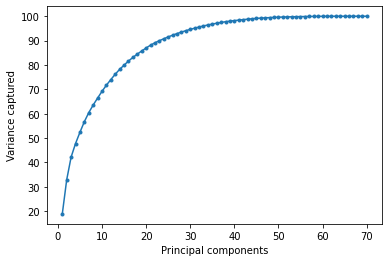

Minimum dimension for at least 89% variance is:  21
Minimum dimension for at least 99% variance is:  44


In [35]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

# Normalise all of the data to ensure they are of similar magnitude.
Xnorm = scale(df)

# Perform the Principal Component Analysis. The number of components is the number of coumns in the dataset.
# The number of components is the minimum of the number of data elements and festures 
n_components=min(df.shape[0], df.shape[1])
print("Number of comoponets: {}".format(n_components))
pca = PCA(n_components)
pca.fit(Xnorm)
print("PCA details => {}".format(pca))

print('='*50)
print("Explained Variance:")
# Calculate the amount of variance explained by each PC
var= pca.explained_variance_ratio_
print(var)

print('='*50)
print("Cumulative Explained Variance:")

cum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(cum_var)

pca_num = a_list = list(range(1, n_components+1))
plt.plot(pca_num, cum_var, marker='.')
plt.xlabel("Principal components")
plt.ylabel("Variance captured")
plt.show()

# Find the minimum dimensions that capture 89% and 99% respectively
result = next(k for k, value in enumerate(cum_var) if value >= 89) 
print("Minimum dimension for at least 89% variance is: ", result)

result = next(k for k, value in enumerate(cum_var) if value >= 99) 
print("Minimum dimension for at least 99% variance is: ", result)

print('='*50)

